<center>
<a href="http://www.udem.edu.co/"><img src="Escudo.png"></a>
<h1>Reconocimiento de Patrones I y II</h1>
<h2>Preprocesamiento de imágenes digitales</h2>
<h3>2018-2</h3>
</center>

## Recordando . . .

## Imágenes digitales

Podemos definir una imagen como una función bidimensional  $f(x1,x2)$  donde  $x=(x1,x2)$  son las coordenadas espaciales, y el valor de  f  en cualquier  x  es la intensidad de la imagen en dicho punto.

Desde este punto de vista, una imagen puede considerarse como una función continua definida sobre un conjunto continuo (imagen analógica) o como una función discreta definida sobre un dominio discreto (imagen digital). Ambos puntos de vista resultan útiles en el procesamiento de imágenes.

Convertir una imagen analógica a digital requiere que tanto las coordenadas como la intensidad sean digitalizadas. Digitalizar las coordenadas se llama muestrear, mientras que digitalizar la intensidad se denomina cuantizar. Entonces, cuando todas las cantidades son discretas, llamamos a la imagen una imagen digital.

El camino opuesto, de digital a analógico, es también posible y se denomina interpolación.

### Coordenadas

El resultado de muestrear y cuantizar es una matriz de números. El tamaño de la imagen es el número de filas por el número de columnas,  M×N . La indexación de la imagen en Python sigue la convención habitual
<center>
<img src="matriz.png">
</center>    

In [27]:
from PIL import Image             #Estamos usando la librería Pillow
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica

In [28]:
 %matplotlib inline

## Lectura, visualización y escritura de imágenes con el módulo Image

Python soporta los formatos de imagen más habituales. Cargemos la image lena.jpg La sintaxis de lectura es

In [29]:
I = Image.open("img/img1.jpg")

El tipo de dato habitual para una imagen es uint8, es decir, un entero sin signo representado en 8 bits. Esto nos da  $2^8=256$  valores que se distribuyen en el rango de  $[0,255]$  para cada pixel.

La variable $I$ no es una matriz, sino un objeto. Podemos visualizarla y realizar algunas operaciones estándar con ella. Por ejemplo, podemos visualizar la imagen con el programa correspondiente del sistema.

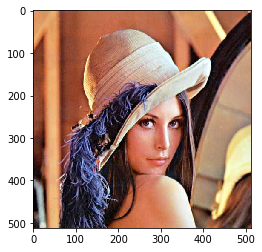

In [30]:
#I.show()    #Abre la imagen con el visor de imágenes predeterminado en la máquina

#Para visualizar la imagen en el notebook
plt.imshow(np.asarray(I))
plt.show()

Podemos obtener información sobre la imagen, en este caso el tamaño, tipo (escala de grises, RGB, etc.), y formato:

In [31]:
print (I.size, I.mode, I.format)

(512, 512) RGB JPEG


Podemos convertirla a otro formato, en este caso a una imagen de escala de grises, que son con las que trabajaremos en este curso:

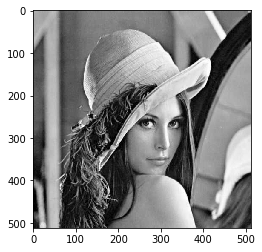

(512, 512) L None


In [32]:
I_gris = I.convert('L')
#I_gris.show()
plt.imshow(np.asarray(I_gris), cmap='gray')
plt.show()
print (I_gris.size, I_gris.mode, I_gris.format)

Para grabar la imagen en disco

In [33]:
I_gris.save('img/img1_gris.tif')

## Tipos de imágenes y conversiones

Existen tres tipos principales de imágenes:

La imagen de intensidad es una matriz de datos cuyos valores han sido escalados para que representen intensidades de una escala de grises. Los elementos de una imagen de intensidad son de clase uint8 (enteros almacenados en 8 bits) o de clase uint16 (enteros almacenados en 16 bits) y pueden almacenar, respectivamente,  $2^8=256$  valores en el rango  $[0,255]$ , o  $2^{16}=65536$ valores en el rango  $[0,65535]$ . Cuando la imagen es de clase float32, los valores son números en punto flotante (que se almacenan en 32 bits). En este último caso, los valores suelen tomarse en el rango  $[0,1]$  o en el rango  $[0,255]$, indistintamente.

La imagen binaria es una imagen en blanco y negro. Cada pixel tiene asignado un valor lógico de 0 ó 1.

La imagen en color es como la imagen de intensidad pero tiene tres canales, es decir, a cada pixel le corresponden tres valores de intensidad (RGB) en lugar de uno.

Cuando realizamos transformaciones matemáticas de imágenes, normalmente necesitamos que la imagen sea de tipo float. Pero cuando la leemos y almacenamos ahorramos espacio usando codificación entera sin signo. Podemos usar las órdenes siguientes:

In [34]:
a = np.asarray(I_gris,dtype=np.float32)   #convierte el objeto I1 en una matriz de tipo float32.

In [35]:
Image.fromarray(a.astype(np.uint8)).save("prueba.jpg")    #primero convierte la matriz a a tipo uint8, y luego a un objeto "imagen".

### Una vez que tenemos definida la imagen como una matriz con elementos float, podemos comenzar a trabajar con ella.

#### Ejemplo de preprocesamiento de una imagen

1. Seleccionar una parte de la imagen mediante la restricción de sus índices.

2. Graficar la selección

3. Guardar el resultado.

In [36]:
ojo = a[251:283,317:349]

### Graficamos la imagen en grises y la selección

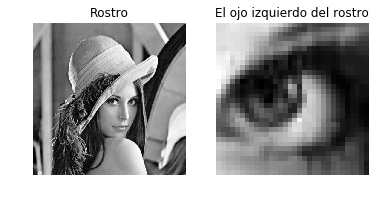

In [37]:
plt.subplot(121)
plt.imshow(a,cmap='gray',interpolation='nearest')
plt.title('Rostro')
plt.axis('off') 

plt.subplot(122)
plt.imshow(ojo, cmap='gray', interpolation='nearest')
plt.title('El ojo izquierdo del rostro')
plt.axis('off')

plt.show()

In [38]:
Image.fromarray(ojo.astype(np.uint8)).save("img/ojo.jpg")  #Se guarda la imagen

## Cargando nuevas imágenes

In [39]:
I2 = Image.open("img/img2.png")
I3 = Image.open("img/img3.jpg")

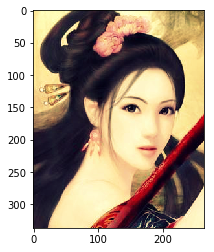

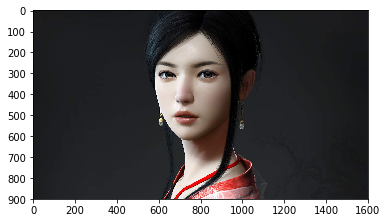

(264, 337) RGB
(1600, 900) RGB


In [40]:
# Motramos las imágenes y las convertimos a escala de grises.
plt.imshow(np.asarray(I2))
plt.show()

plt.imshow(np.asarray(I3))
plt.show()

print(I2.size, I2.mode)
print(I3.size, I3.mode)


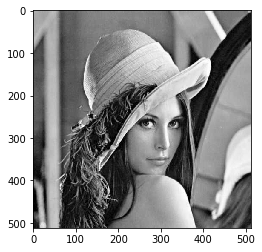

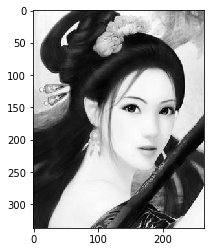

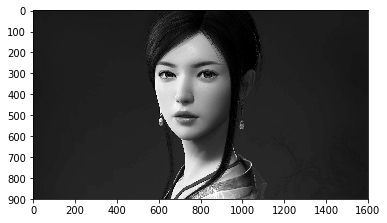

In [41]:
#Convertimos a escala de grises

#Para I
I_gris = I.convert('L')
plt.imshow(np.asarray(I_gris), cmap='gray')
plt.show()

#Para I2
I2_gris = I2.convert('L')
plt.imshow(np.asarray(I2_gris), cmap='gray')
plt.show()

#Para I3
I3_gris = I3.convert('L')
plt.imshow(np.asarray(I3_gris), cmap='gray')
plt.show()

In [42]:
# Convertimos a formato float 32 para manipular las imagenes en formato matricial

#Para I
Imat = np.asarray(I_gris,dtype=np.float32)

#Para I2
I2mat = np.asarray(I2_gris,dtype=np.float32)

#Para I3
I3mat = np.asarray(I3_gris,dtype=np.float32)

#print(np.size(I2mat,0))

## Resolviendo el laboratorio I

En la siguiente celda, extraiga la boca de mujer de la primera imagen (cargada en el objeto I) y guardela en una variable. Luego grafique la imagen completa y a su lado la imagen de la boca que extrajo.

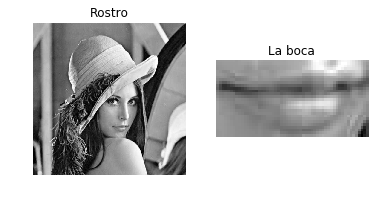

In [43]:
boca = Imat[340:368,265:320]

plt.subplot(121)
plt.imshow(Imat,cmap='gray',interpolation='nearest')
plt.title('Rostro')
plt.axis('off') 

plt.subplot(122)
plt.imshow(boca, cmap='gray')
plt.title('La boca')
plt.axis('off')

plt.show()

#Para guardar
Image.fromarray(Imat.astype(np.uint8)).save("img/Lena_grises.jpg")  #Se guarda la imagen
Image.fromarray(boca.astype(np.uint8)).save("img/boca_Lena.jpg")  #Se guarda la imagen

## Rotación de 90 grados a izquierda (usando la imagen 2)

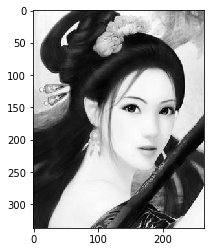

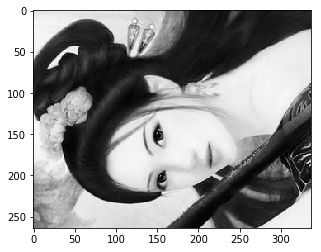

In [44]:
plt.imshow(np.asarray(I2_gris), cmap='gray')
plt.show()

newI2 = (I2mat.T)
newI2 = Image.fromarray(newI2.astype(np.uint8))
#print(newa[511,511])
plt.imshow(newI2)
plt.show()

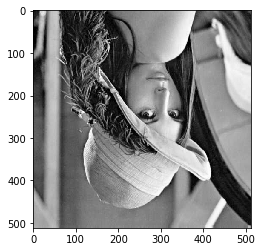

In [45]:
#Rotando la imagen 180 grados

nI = np.zeros([512,512])
#print (newa.shape)
k = 511
for i in range(np.size(Imat,0)):
    for j in range(np.size(Imat,1)):
        nI[i,j] = Imat[k,j]
    k -= 1     
newI = Image.fromarray(nI.astype(np.uint8))
#print(newa[511,511])
plt.imshow(newI)
plt.show()

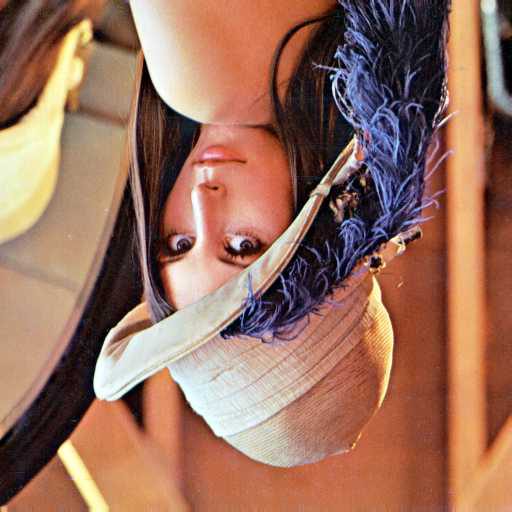

In [46]:
#También se puede usar la función rotate de la librería PIL
I.rotate(540)

## Operaciones sobre el histograma y filtrado de la imagen

Las principales técnicas de procesamiento digital de imágenes mejoran y realzan sus características.
Las operaciones que son llevadas a cabo por este tipo de técnicas implican la alteración del
histograma de la imagen o el procesamiento del valor de sus píxeles. En este capítulo se describen
las principales operaciones sobre el histograma junto con los principales métodos de filtrado
frecuencial y espacial.

### El histograma de la imagen

Dada una imagen cuyos píxeles se encuentren definidos en escala de grises con valores entre 0 y
255, se llama histograma de la imagen al gráfico que se obtiene de la representación de la frecuencia
de aparición de cada uno de los valores (Ver siguiente Figura). Recordando que el 0 representa el negro y el 255, en
este caso, representa el blanco, el histograma muestra desde los píxeles oscuros a los claros.

<img src="hist_fig.png">

Si cada frecuencia es dividida entre el número total de píxeles de la imagen se obtiene el histograma
normalizado. En ese caso cada valor obtenido representa la probabilidad de obtener un píxel con el
valor de intensidad al que está asociada la frecuencia.

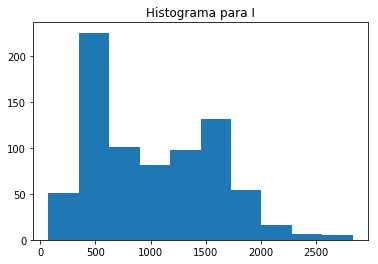

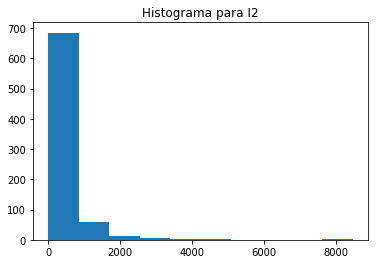

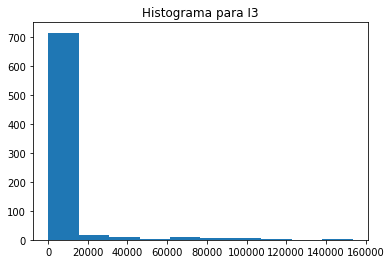

In [47]:
# calcular y mostar el histograma para las 3 imágenes de prueba cargadas.

h1 = I.histogram()
h2 = I2.histogram()
h3 = I3.histogram()

plt.hist(h1)
plt.title('Histograma para I')
plt.show()

plt.hist(h2)
plt.title('Histograma para I2')
plt.show()

plt.hist(h3)
plt.title('Histograma para I3')
plt.show()


#### ¿Estos histogramas corresponden a los histogramas de la definición presentada en este documento?

### Explorar la librería y sus métodos:

https://pillow.readthedocs.io/en/5.1.x/reference/Image.html

### Ejercicio

Construir un método para presentar el histograma de una imagen, tal como lo definimos.

Corriendo . . .
Finalizado.


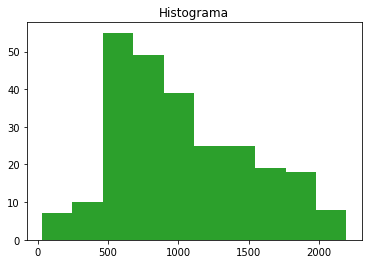

In [48]:
def histograma(img):
    '''
    Este método calcula el histograma de una imagen.
    Parámetros:
    img: es una imagen en formato float32
    
    Retorna:
    h: es una lista con las frecuencias de aparición de cada valor entre 0 y 255 en 
    la representación matricial de la imagen.
    
    '''
    
    h = []
    
    for intensidad in range(0,255):
        cuenta = 0
        for i in range(np.size(img,0)):
            for j in range(np.size(img,1)):
                if intensidad == img[i,j]:
                    cuenta += 1
        
        h.append(cuenta)

    
    
    plt.hist(h)
    plt.title("Histograma")
    return h

print('Corriendo . . .')
hist_list = histograma(Imat)
plt.hist(hist_list)
print('Finalizado.')

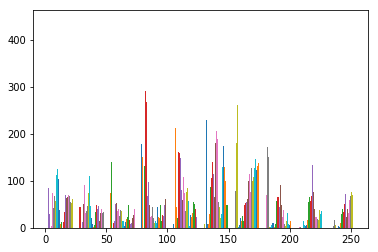

In [59]:
plt.hist(Imat)
plt.show()

### Umbralización del histograma

El proceso de umbralizado obtiene, generalmente, una imagen binarizada a partir de la imagen original. Sean $I$ e $I'$ la imagen original y su imagen umbralizada, U el valor de intensidad
establecido como umbral y $L-1$ el mayor nivel de intensidad posible, cada nuevo píxel $I'_{ij}$ se obtiene
mediante:
    
<center><img src="umbral1.png"></center>






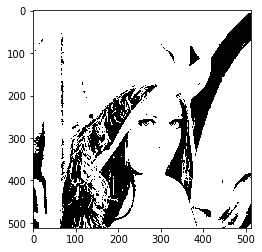

In [53]:
#Ya las imagenes las tenemos en escala de grises

umbral = 60

datos=I_gris.getdata()
datos_binarios=[]

for x in datos:
    if x<umbral:
        datos_binarios.append(0)
        continue
    #si es mayor o igual a umbral se agrega 1 en vez de 0
    #podria hacerse con 255 en ves de 1
    datos_binarios.append(1)

#en caso de utilizar 255 como valor superior el metodo new
#llevaria 'L' en ves de '1' en el primer argumento. Consultar el método Image.new
nueva_imagen=Image.new('1',I.size)
nueva_imagen.putdata(datos_binarios)
plt.imshow(nueva_imagen)

## Referencias

Alegre, E., Pajares, G., & de la Escalera, A. (2016). Conceptos y Métodos en Visión por Computador.

https://www.unioviedo.es/compnum/laboratorios_py/Intro_imagen/introduccion_imagen.html